# Decision tree
Implementaremos un Decision Tree sencillo como primera aproximación a los algoritmos de clasificación.
Código de [datacamp](https://www.datacamp.com/community/tutorials/decision-tree-classification-python)

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier      # Importamos el clasificador Decision Tree
from sklearn.model_selection import train_test_split # Importamos la función train_test_split
from sklearn import metrics                          # Importamos el modulo scikit-learn metrics para cálculo de precisión

## Los datos
Cargaremos los datos. La tabla contienen $p_T$, $m$, $\eta$, $\phi$, $E$, $\tau_{21}$, $m_{jj}$ y $\Delta R_{12}$ de los dos jets principales del clustering, así como el *nro. de hadrones* del evento y una columna *label* que indica si es señal (1) o fondo (0)

In [2]:
# Cargamos el dataframe RD
df_RD = pd.read_csv('../data/eventosRD_100000.csv')
df_RD.head()

E_j1         E_j2  deltaR_j12    eta_j1    eta_j2  label  \
0  1541.103551  1314.832020    3.046675 -0.676879 -0.479236    0.0   
1  1735.554053  1456.732975    3.175913  0.487036  0.215936    0.0   
2  1747.277774  2131.876916    3.196916 -0.561281 -0.915332    0.0   
3  1955.619525  2206.429386    3.483775  0.608165 -0.867853    0.0   
4  1810.986292  2424.718009    3.642805 -0.664116  1.154562    0.0   

         m_j1        m_j2        m_jj  n_hadrones        pT_j1        pT_j2  \
0  140.326113   53.455092  193.781205       212.0  1239.698604  1176.086061   
1  140.960881   91.964940  232.925821       160.0  1543.152632  1420.578669   
2  130.198271  595.900967  726.099237       245.0  1499.892043  1412.636020   
3  388.869494   37.471626  426.341119       116.0  1609.609763  1574.869196   
4  242.616470  201.110818  443.727289       146.0  1460.557601  1385.597608   

     phi_j1    phi_j2  tau_21_j1  tau_21_j2  
0 -0.949919  2.090338   0.672299   0.556964  
1  0.580209 -2.584112   0.429885   0.709729  
2 -2.168662  1.008589   0.682710   0.489799  
3 -0.565932  2.589707   0.740089   0.559426  
4 -1.685001  1.471332   0.437715   0.566019

## Clasificador
Primero, separaremos las características y la columna que indica si el evento es señal o fondo

In [3]:
# Creamos una lista con las características a considerar en el modelo
carac_cols = df_RD.columns.values.tolist()
# Eliminamos 'label' porque no es una característica
carac_cols.remove('label')
carac_cols

['E_j1',
 'E_j2',
 'deltaR_j12',
 'eta_j1',
 'eta_j2',
 'm_j1',
 'm_j2',
 'm_jj',
 'n_hadrones',
 'pT_j1',
 'pT_j2',
 'phi_j1',
 'phi_j2',
 'tau_21_j1',
 'tau_21_j2']

In [4]:
# Hacemos un dataframe solo con las características
X = df_RD[carac_cols]
X.head()

E_j1         E_j2  deltaR_j12    eta_j1    eta_j2        m_j1  \
0  1541.103551  1314.832020    3.046675 -0.676879 -0.479236  140.326113   
1  1735.554053  1456.732975    3.175913  0.487036  0.215936  140.960881   
2  1747.277774  2131.876916    3.196916 -0.561281 -0.915332  130.198271   
3  1955.619525  2206.429386    3.483775  0.608165 -0.867853  388.869494   
4  1810.986292  2424.718009    3.642805 -0.664116  1.154562  242.616470   

         m_j2        m_jj  n_hadrones        pT_j1        pT_j2    phi_j1  \
0   53.455092  193.781205       212.0  1239.698604  1176.086061 -0.949919   
1   91.964940  232.925821       160.0  1543.152632  1420.578669  0.580209   
2  595.900967  726.099237       245.0  1499.892043  1412.636020 -2.168662   
3   37.471626  426.341119       116.0  1609.609763  1574.869196 -0.565932   
4  201.110818  443.727289       146.0  1460.557601  1385.597608 -1.685001   

     phi_j2  tau_21_j1  tau_21_j2  
0  2.090338   0.672299   0.556964  
1 -2.584112   0.429885   0.709729  
2  1.008589   0.682710   0.489799  
3  2.589707   0.740089   0.559426  
4  1.471332   0.437715   0.566019

In [5]:
# Obtenemos la serie con la información sobre señal o fondo
y = df_RD['label']
type(y)

pandas.core.series.Series

Separamos el conjunto de datos en conjunto de entrenamiento y de prueba:

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% entrenamiento y 30% prueba

Creamos y entrenamos el modelo:

In [7]:
# Creamos el objeto del clasificador Decision Tree
cdt = DecisionTreeClassifier()

# Entrenamos al clasificador
cdt = cdt.fit(X_train,y_train)

# Obtenemos las predicciones para el conjunto de prueba
y_pred = cdt.predict(X_test)

In [8]:
# Precisión del modelo, cuánto de la clasificación es correcto?
print("Precisión:",metrics.accuracy_score(y_test, y_pred))

Precisión: 0.9472


## Gráfico del modelo
Para entender cómo está clasificando el modelo, podemos graficarlo

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.320356 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.320356 to fit



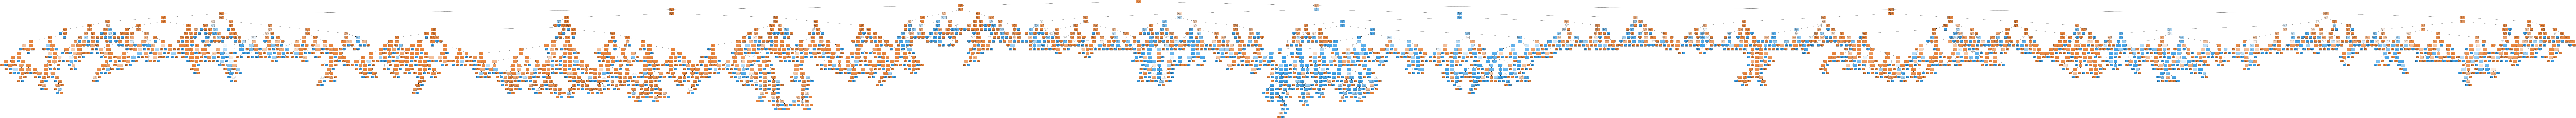

In [9]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(cdt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = carac_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('../data/decisiontree.png')
Image(graph.create_png())

## Optimización
Para el Árbol de decisión anterior se utilizó el *índice Gini* como medida de selección. Sin embargo, se obtuvo un Árbol complicado de entender. Podemos intentar optimizarlo utilizando otra medida de selección, como la *entropía*

In [10]:
# Creamos el objeto del Arbol de Decisión
cdt = DecisionTreeClassifier(criterion="entropy", # La medida de selección es la entropia
                             max_depth=3)         # Y fijamos la máxima profundidad del árbol 

# Entrenamos el clasificador
cdt = cdt.fit(X_train,y_train)

# Predecimos la respuesta para el conjunto de prueba
y_pred = cdt.predict(X_test)

# Calculamos la precisión del modelo
print("Precisión:",metrics.accuracy_score(y_test, y_pred))

Precisión: 0.9440666666666667


Notamos que la precisión no disminuye de manera dramática. Ahora graficamos:

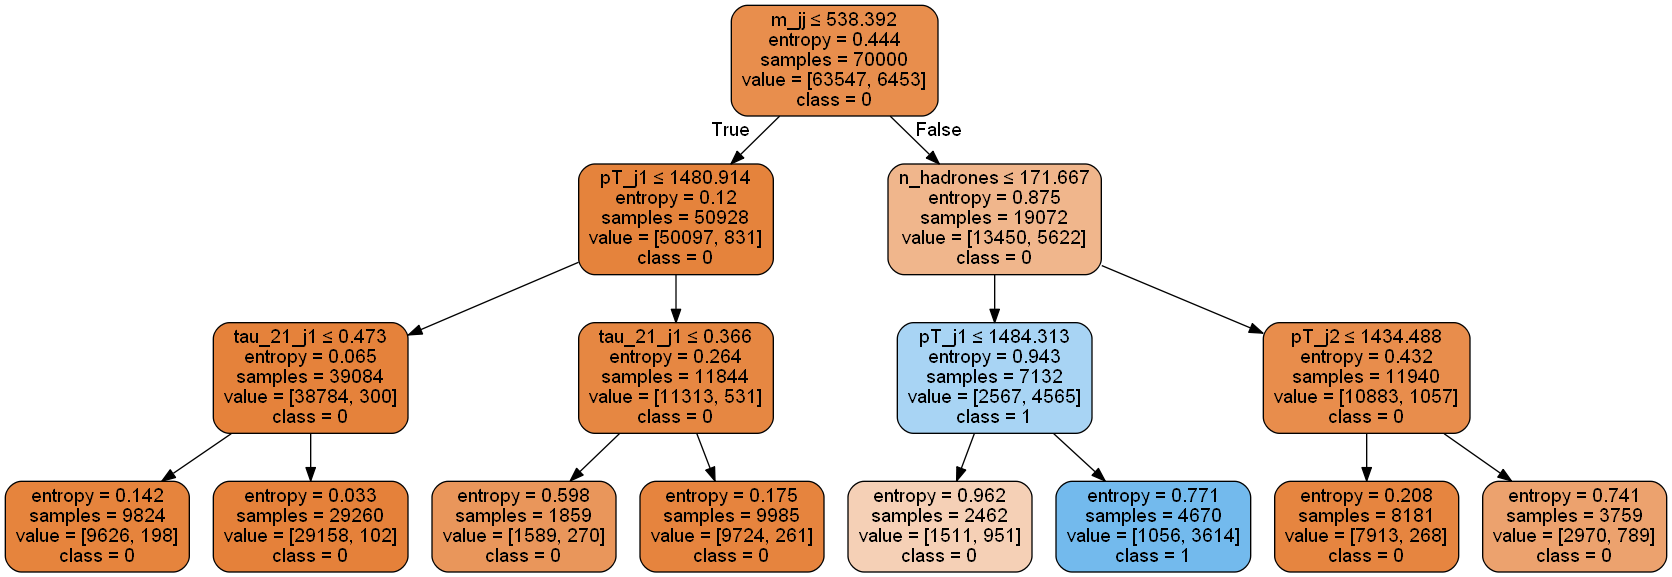

In [11]:
dot_data = StringIO()
export_graphviz(cdt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = carac_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('../data/decisiontreeshort.png')
Image(graph.create_png())

Con este Árbol de Decisión es más fácil entender el criterio de clasificación.

## Black Box 1
Podemos probar el clasificador en la BB1. Cargamos los datos:

In [12]:
df_bb = pd.read_csv('../data/eventosBB1_100000.csv')
df_bb.head()

E_j1         E_j2  deltaR_j12    eta_j1    eta_j2  label  \
0  1563.704411  1802.812644    3.154878  0.215797  0.724064    0.0   
1  2672.474719  1776.179488    2.699110  0.659932  0.648318    0.0   
2  1419.017839  1758.557371    3.277478 -0.147723  0.725017    0.0   
3  1305.230912  3047.866378    3.474055  0.214087 -1.718316    0.0   
4  1537.733425  1370.397248    3.120373  0.271324  0.093318    0.0   

         m_j1        m_j2         m_jj  n_hadrones        pT_j1        pT_j2  \
0  162.112941  153.211835   315.324776        77.0  1519.754514  1410.194772   
1  999.760867  549.878495  1549.639362       288.0  2021.928491  1387.062287   
2  151.422868  640.423695   791.846563       214.0  1395.659808  1285.009488   
3   70.102505  252.674687   322.777192       117.0  1274.038565  1055.652281   
4   55.673065  118.221098   173.894163        72.0  1481.845642  1359.365265   

     phi_j1    phi_j2  tau_21_j1  tau_21_j2  
0 -0.320496  2.793171   0.889400   0.978155  
1 -1.640937  1.058148   0.356523   0.360868  
2  0.979668 -2.179476   0.585259   0.181974  
3  1.325886 -1.561132   0.690229   0.240786  
4  0.849572 -2.265720   0.570342   0.957220

Obtenemos las predicciones del modelo

In [13]:
pred_bb1 = cdt.predict(df_bb[carac_cols])

In [14]:
# Convertimos en dataframe para fácil manipulación
df_pred = pd.DataFrame(pred_bb1, columns=['pred'])
df_pred.head()

pred
0   0.0
1   0.0
2   0.0
3   0.0
4   0.0

In [15]:
# Verificamos que tengan la misma cantidad de eventos
df_pred.shape[0] == df_bb['label'].shape[0]

True

Concatenamos la columna con las predicciones al dataframe:

In [16]:
df_bb = pd.concat([df_bb, df_pred], axis=1, sort=False)
df_bb.head()

E_j1         E_j2  deltaR_j12    eta_j1    eta_j2  label  \
0  1563.704411  1802.812644    3.154878  0.215797  0.724064    0.0   
1  2672.474719  1776.179488    2.699110  0.659932  0.648318    0.0   
2  1419.017839  1758.557371    3.277478 -0.147723  0.725017    0.0   
3  1305.230912  3047.866378    3.474055  0.214087 -1.718316    0.0   
4  1537.733425  1370.397248    3.120373  0.271324  0.093318    0.0   

         m_j1        m_j2         m_jj  n_hadrones        pT_j1        pT_j2  \
0  162.112941  153.211835   315.324776        77.0  1519.754514  1410.194772   
1  999.760867  549.878495  1549.639362       288.0  2021.928491  1387.062287   
2  151.422868  640.423695   791.846563       214.0  1395.659808  1285.009488   
3   70.102505  252.674687   322.777192       117.0  1274.038565  1055.652281   
4   55.673065  118.221098   173.894163        72.0  1481.845642  1359.365265   

     phi_j1    phi_j2  tau_21_j1  tau_21_j2  pred  
0 -0.320496  2.793171   0.889400   0.978155   0.0  
1 -1.640937  1.058148   0.356523   0.360868   0.0  
2  0.979668 -2.179476   0.585259   0.181974   0.0  
3  1.325886 -1.561132   0.690229   0.240786   0.0  
4  0.849572 -2.265720   0.570342   0.957220   0.0

Calculamos la precisión del modelo 

In [17]:
# Calculamos la precisión del modelo
print("Precisión:", metrics.accuracy_score(df_bb['label'], df_pred))

Precisión: 0.9687


Podemos obtener un reporte general con *metrics*

In [18]:
# "Build a text report showing the main classification metrics."
print(metrics.classification_report(df_bb['label'], df_pred, target_names=['fondo','senal']))

              precision    recall  f1-score   support

       fondo       1.00      0.97      0.98     99914
       senal       0.02      0.58      0.03        86

    accuracy                           0.97    100000
   macro avg       0.51      0.78      0.51    100000
weighted avg       1.00      0.97      0.98    100000



In [19]:
# Compute the balanced accuracy.

# The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. 
# It is defined as the average of recall obtained on each class.

print(metrics.balanced_accuracy_score(df_bb['label'], df_pred))

0.7752143587671444


In [20]:
# Compute the precision.

# The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
# The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

print(metrics.precision_score(df_bb['label'], df_pred))

0.015903307888040712


## Matriz de confusión

Una matriz de confusión es una herramienta que permite visualizar el desempeño de un algoritmo de aprendizaje supervisado. Los elementos diagonales representan el número de puntos para los cuales la etiqueta predicha es igual a la etiqueta verdadera, mientras que los elementos fuera de la diagonal son aquellos que están mal etiquetados por el clasificador. Cuanto más altos sean los valores diagonales de la matriz de confusión, mejor, lo que indica muchas predicciones correctas.

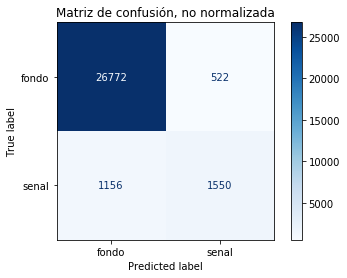

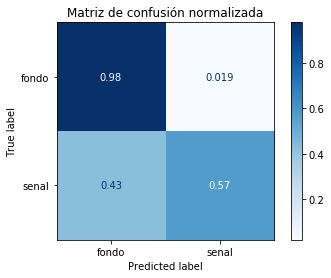

In [22]:
import matplotlib.pyplot as plt

# Plot matriz de confusión
# Código: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

titles_options = [("Matriz de confusión, no normalizada", None),
                  ("Matriz de confusión normalizada", 'true')]
for title, normalize in titles_options:
    disp = metrics.plot_confusion_matrix(cdt, X_test, y_test,
                                 display_labels=['fondo','senal'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    plt.show()